# Network Science & Graph Analytics

Every data set *can* be modelled with a table and relationships between tables. This is often the best place to start. 

However, *practically* certain queries and data structure requirements will push you to use a different data model. 

Often in graph analysis, your data will start in a relational database (csv, ...) and then get imported for analysis.

In [1]:
import pandas as pd
passengers = pd.read_csv('passengers.csv')

In [3]:
passengers.head()

,Unnamed: 0,YEAR,ORIGIN,DEST,UNIQUE_CARRIER_NAME,PASSENGERS
0,0,1990,ABE,ACY,{'US Airways Inc.'},73.0
1,1,1990,ABE,ATL,{'Eastern Air Lines Inc.'},73172.0
2,2,1990,ABE,AVL,{'Westair Airlines Inc.'},0.0
3,3,1990,ABE,AVP,"{'Westair Airlines Inc.', 'US Airways Inc.', '...",8397.0
4,4,1990,ABE,BHM,{'Eastern Air Lines Inc.'},59.0


In [6]:
import networkx as nx

In [14]:
G = nx.from_edgelist(
    passengers[ ['ORIGIN', 'DEST'] ].values, nx.MultiGraph
)

In [17]:
len(G)

2177

In [18]:
PG = nx.from_pandas_edgelist(
    passengers, 
    source='ORIGIN', 
    target='DEST', 
    edge_attr=['YEAR', 'PASSENGERS', 'UNIQUE_CARRIER_NAME'], 
    create_using=nx.MultiDiGraph()
)

In [22]:
'JFK' in PG

True

In [24]:
PG['ORD']['JFK'][0]

{'YEAR': 1990,
 'PASSENGERS': 133191.0,
 'UNIQUE_CARRIER_NAME': "{nan, 'United Air Lines Inc.', 'Pan American World Airways (1)', 'World Airways Inc.', 'Trans World Airways LLC', 'American Airlines Inc.', 'Alia-(The) Royal Jordanian', 'Aer Lingus Plc', 'Air Charter (Safa)', 'Compagnia Aerea Italiana', 'Evergreen International Inc.', 'Compagnie Natl Air France', 'El Al Israel Airlines Ltd.'}"}

In [33]:
max([ edge['YEAR'] for edge_id, edge in PG['ORD']['JFK'].items() ])

2015

In [30]:
from statistics import mean

In [31]:
mean([ edge['PASSENGERS'] for edge_id, edge in PG['ORD']['JFK'].items() ])

139456.26923076922

In [46]:
chicago2ny = {e['YEAR']: e['PASSENGERS'] for e in PG['ORD']['JFK'].values() }

In [41]:
import matplotlib.pyplot as plt

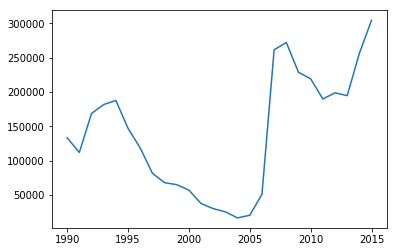

In [43]:
plt.plot(chicago2ny.keys(), chicago2ny.values());

In [45]:
ny2c = {e['YEAR']: e['PASSENGERS'] for e in PG['JFK']['ORD'].values() }

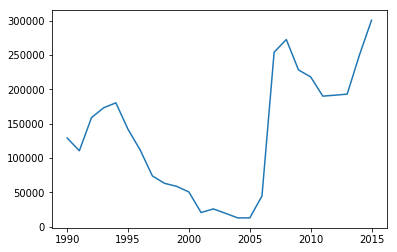

In [47]:
plt.plot(ny2c.keys(), ny2c.values());

## Exercise

In [50]:
list(PG.nodes())[:5]

['ABE', 'ACY', 'ATL', 'AVL', 'AVP']

In [52]:
'ABE' in PG

True

In [53]:
'JFK' in PG

True

In [61]:
abe2jfk = {edge['YEAR']: edge['PASSENGERS'] for edge in PG['ABE']['JFK'].values() }

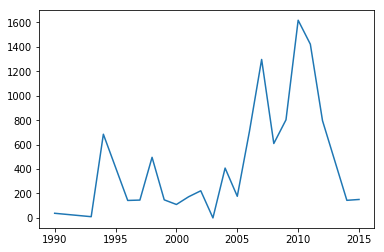

In [64]:
plt.plot(abe2jfk.keys(), abe2jfk.values());

* Choose two airpots in america which are in the graph
    * verify they are present
* Create a dictionary which maps their years to passengers
    * visualize the passenger trends forwards and backwards


EXTRA:
* Review the GraphModelling notebook
* In particular: what does degree centrality and betweeness centrality measure?
* Investigate the most important nodes

### Centrality Measures

* Degree Centrality 
    * How many connected nodes (friends, neighbors) a node has as a fraction of total possible neighbors
* Betweenness Centrality
    * How many shortest paths go through this node
    
    

In [68]:
ranked = sorted( 
    ((rank, code) for code, rank in nx.degree_centrality(PG).items()),
    reverse=True
)

In [70]:
ranked[:10]

[(4.446231617647059, 'ATL'),
 (4.3046875, 'ORD'),
 (4.261029411764706, 'MSP'),
 (4.016084558823529, 'DFW'),
 (3.8920036764705883, 'DEN'),
 (3.5510110294117645, 'DTW'),
 (3.4862132352941178, 'MEM'),
 (3.2904411764705883, 'IAH'),
 (3.1916360294117645, 'STL'),
 (3.1796875, 'LAX')]

In [73]:
ranked = sorted( 
    ((rank, code) for code, rank in nx.betweenness_centrality(PG).items()),
    reverse=True
)

In [74]:
ranked[:10]

[(0.20278386833015108, 'ANC'),
 (0.07673048365724555, 'FAI'),
 (0.05612505733683818, 'HPN'),
 (0.05095656684607149, 'YIP'),
 (0.03381499721050059, 'JNU'),
 (0.03369365892681822, 'BUR'),
 (0.03088112974773567, 'TEB'),
 (0.028965851509976083, 'SEA'),
 (0.028339611766222864, 'BFI'),
 (0.026096384557146583, 'ADQ')]

### Open-Ended Exploration Questions

* What happens to the network as important nodes are removed?
* What happens as connections between the least important nodes are added?
* Where should you add a route to reduce the importance of hubs?
    * def. hub = nodes with high betweenness, ie., bottlenecks